In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/quesn2/train.csv')
files = list(df['FileID'])
labels = np.array(df['Label'])


In [3]:
X = []
Y = []
for index,i in enumerate(files) :
    path = '/kaggle/input/comp-data/'+i
    ndf = pd.read_csv(path)
    x = list(ndf['data'])
    for j in range(len(x)//51300):
        x_dash = x[51300*j : 51300*(j+1)]
        y_dash = labels[index]
        X.append(x_dash)
        Y.append(y_dash)

In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X,Y, random_state=42, test_size = 0.25)

In [6]:
x_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
x_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

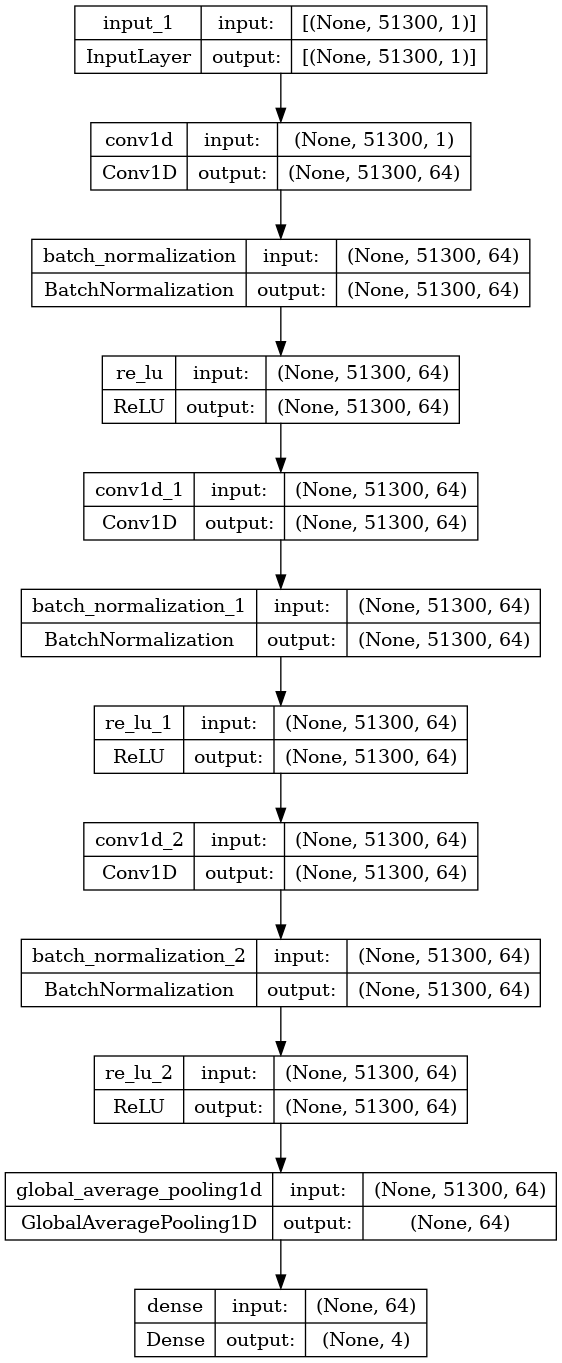

In [7]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(4, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [8]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
8/8 [==============================] - 11s 258ms/step - loss: 1.1990 - sparse_categorical_accuracy: 0.5644 - val_loss: 1.3393 - val_sparse_categorical_accuracy: 0.4211 - lr: 0.0010
Epoch 2/500
8/8 [==============================] - 1s 179ms/step - loss: 0.9694 - sparse_categorical_accuracy: 0.8000 - val_loss: 1.3030 - val_sparse_categorical_accuracy: 0.5789 - lr: 0.0010
Epoch 3/500
8/8 [==============================] - 1s 186ms/step - loss: 0.8383 - sparse_categorical_accuracy: 0.8311 - val_loss: 1.2774 - val_sparse_categorical_accuracy: 0.4386 - lr: 0.0010
Epoch 4/500
8/8 [==============================] - 1s 178ms/step - loss: 0.7662 - sparse_categorical_accuracy: 0.7778 - val_loss: 1.2583 - val_sparse_categorical_accuracy: 0.4561 - lr: 0.0010
Epoch 5/500
8/8 [==============================] - 1s 178ms/step - loss: 0.7002 - sparse_categorical_accuracy: 0.8089 - val_loss: 1.2522 - val_sparse_categorical_accuracy: 0.3158 - lr: 0.0010
Epoch 6/500
8/8 [======================

In [9]:
nmodel = keras.models.load_model("best_model.h5")

test_loss, test_acc = nmodel.evaluate(x_test, Y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

3/3 [==============================] - 1s 157ms/step - loss: 0.1983 - sparse_categorical_accuracy: 1.0000
Test accuracy 1.0
Test loss 0.19826622307300568


In [10]:
dfone = pd.read_csv('/kaggle/input/quesn2/train.csv')
dftwo= pd.read_csv('/kaggle/input/quesn3/train.csv')
filesone = list(dfone['FileID'])
filestwo = list(dftwo['FileID'])
labelsone = list(dfone['Label'])
labelstwo = list(dftwo['Label'])
for i in range(len(dftwo)):
    filesone.append(filestwo[i])
    labelsone.append(labelstwo[i])
files = filesone
labels = labelsone

In [11]:
X = []
Y = []
for index,i in enumerate(files):
    path = '/kaggle/input/comp-data/'+i
    ndf = pd.read_csv(path)
    x = list(ndf['data'])
    for j in range(len(x)//51300):
        x_dash = x[51300*j : 51300*(j+1)]
        x_dummy = np.array(x_dash)
        x_dummy = x_dummy.reshape((1,51300,1))
        y_dash = labels[index]
        preds = list(nmodel.predict(x_dummy)[0])
        preds = preds*(12825)
        preds = np.array(preds)
        xey = []
        xey.append(np.array(x_dash))
        xey.append(preds)
        X.append(np.array(xey))
        Y.append(y_dash)

1/1 [==============================] - 0s 32ms/step


In [12]:
X = np.array(X)
Y = np.array(Y)

In [13]:
X[0].shape

(2, 51300)

In [14]:
X[0][0].shape

(51300,)

In [15]:
X[0][1].shape

(51300,)

In [16]:
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2], 1))


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X,Y, random_state=42, test_size = 0.25)

In [18]:
# X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))

In [19]:
# x_train = X_train.reshape((X_train.shape[0], c, d))
# x_test = X_test.reshape((X_test.shape[0], c, d))
X.shape


(1043, 2, 51300, 1)

In [20]:
import keras

def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv2D(filters=64, kernel_size=(1, 3), padding="valid")(input_layer)  # Reduce kernel width
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv2D(filters=64, kernel_size=(1, 3), padding="valid")(conv1)  # Reduce kernel width
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv2D(filters=64, kernel_size=(1, 3), padding="valid")(conv2)  # Reduce kernel width
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling2D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

# Assuming x_train is now a 2D input array with shape (num_samples, width, height, channels)
input_shape = (2, 51300, 1)  # Reshape the input to (height, width, channels)
nmodel = make_model(input_shape=input_shape)
nmodel.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2, 51300, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 2, 51298, 64)      256       
                                                                 
 batch_normalization_3 (Batc  (None, 2, 51298, 64)     256       
 hNormalization)                                                 
                                                                 
 re_lu_3 (ReLU)              (None, 2, 51298, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 51296, 64)      12352     
                                                                 
 batch_normalization_4 (Batc  (None, 2, 51296, 64)     256       
 hNormalization)                                           

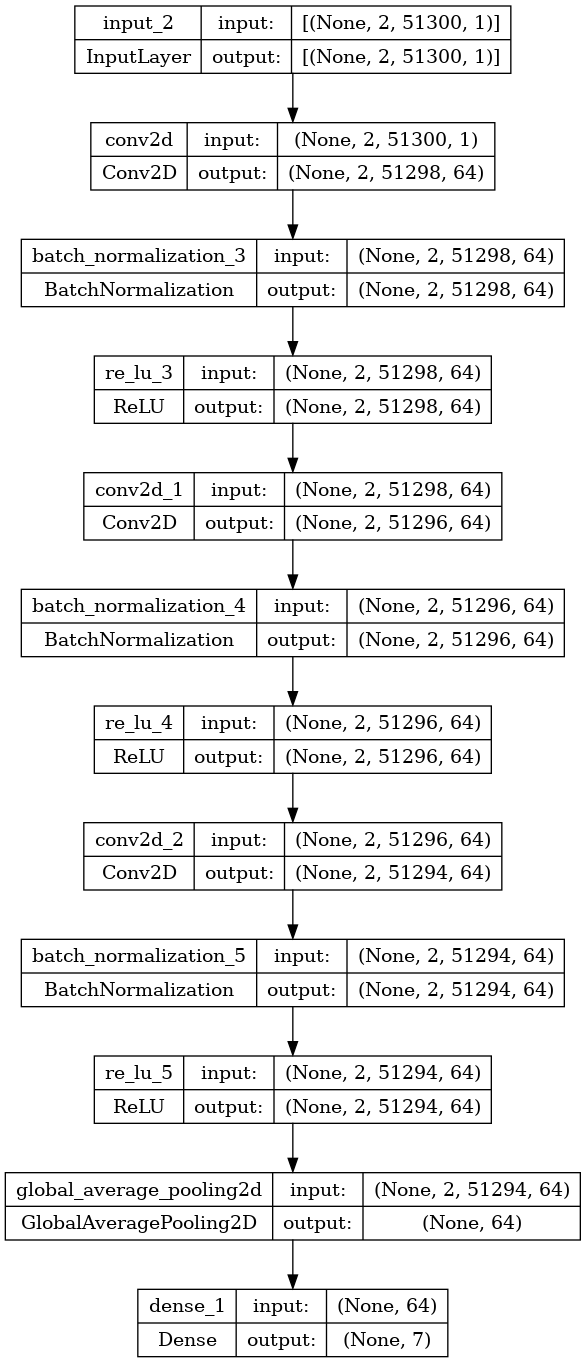

In [21]:
keras.utils.plot_model(nmodel, show_shapes=True)

In [24]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "nmodel.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
nmodel.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = nmodel.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
20/20 [==============================] - 12s 348ms/step - loss: 1.7853 - sparse_categorical_accuracy: 0.4048 - val_loss: 1.8939 - val_sparse_categorical_accuracy: 0.4395 - lr: 0.0010
Epoch 2/500
20/20 [==============================] - 5s 246ms/step - loss: 1.5194 - sparse_categorical_accuracy: 0.4976 - val_loss: 1.8449 - val_sparse_categorical_accuracy: 0.2866 - lr: 0.0010
Epoch 3/500
20/20 [==============================] - 5s 229ms/step - loss: 1.3130 - sparse_categorical_accuracy: 0.6096 - val_loss: 1.7997 - val_sparse_categorical_accuracy: 0.2293 - lr: 0.0010
Epoch 4/500
20/20 [==============================] - 5s 245ms/step - loss: 1.1615 - sparse_categorical_accuracy: 0.6784 - val_loss: 1.7909 - val_sparse_categorical_accuracy: 0.2357 - lr: 0.0010
Epoch 5/500
20/20 [==============================] - 5s 226ms/step - loss: 1.0559 - sparse_categorical_accuracy: 0.7056 - val_loss: 1.8289 - val_sparse_categorical_accuracy: 0.2675 - lr: 0.0010
Epoch 6/500
20/20 [==========

In [25]:
nmodel = keras.models.load_model("nmodel.h5")

test_loss, test_acc = nmodel.evaluate(X_test, Y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

9/9 [==============================] - 1s 74ms/step - loss: 0.0375 - sparse_categorical_accuracy: 0.9923
Test accuracy 0.992337167263031
Test loss 0.03750421479344368


In [41]:
nmodel.predict(X_test).shape

9/9 [==============================] - 0s 59ms/step


(261, 7)

In [26]:
ndf = pd.read_csv('/kaggle/input/quesn3/test.csv')


In [53]:
files = list(ndf['FileID'])
Y = []
for index,file in enumerate(files):
    path = '/kaggle/input/comp-data/'+file
    nndf = pd.read_csv(path)
    x = np.array(nndf['data'])
    x=x[:51300]
    dum_x = x
    x = x.reshape((1,51300,1))
    preds = list(model.predict(x)[0])
    arr = []
    arr.append(dum_x)
    arr.append(np.array(preds*12825))
    arr = np.array(arr)
    arr = arr.reshape((1,2,51300,1))
    npreds = nmodel.predict(arr)
    pred = np.argmax(npreds[0])
    Y.append(pred)
    
    
    

1/1 [==============================] - 0s 18ms/step


In [54]:
Y

[2,
 4,
 3,
 0,
 2,
 5,
 6,
 1,
 0,
 0,
 5,
 3,
 0,
 1,
 0,
 0,
 3,
 6,
 2,
 3,
 0,
 5,
 6,
 4,
 2,
 1,
 3,
 0,
 3,
 6,
 0,
 1,
 5,
 5,
 1,
 6,
 3,
 3,
 6,
 1,
 1,
 3,
 1,
 4,
 0,
 6,
 2,
 3,
 2,
 4,
 1,
 2,
 4,
 5,
 0,
 1,
 0,
 0,
 3,
 6,
 5,
 1,
 5,
 2,
 3,
 1,
 0,
 5,
 5,
 3,
 3,
 4,
 6,
 5,
 5,
 6,
 3,
 3,
 2,
 5,
 0,
 5,
 1,
 2,
 5,
 4,
 6,
 1,
 0,
 6,
 2,
 6,
 5,
 5,
 3,
 2,
 2,
 1,
 5,
 3,
 5,
 4,
 5,
 1,
 3,
 5,
 2,
 6,
 4,
 3,
 0]

In [56]:
ndf['Label'] = Y

ndf.to_csv('finalsubmission.csv', index=False)